In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
apples_data = pd.read_csv('/content/drive/MyDrive/DeepLearning_Colab/apple_quality.csv')
apples_data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
apples_data.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [ ]:
apples_data.shape

(4001, 9)

In [ ]:
apples_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
apples_data.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [ ]:
apples_data.dropna(inplace=True)

In [ ]:
apples_data['Quality'].unique()

array(['good', 'bad'], dtype=object)

In [ ]:
apples_data['Acidity'] = pd.to_numeric(apples_data['Acidity'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
apples_data['Quality'] = LabelEncoder().fit_transform(apples_data['Quality'])

In [ ]:
X = apples_data.drop(columns=['Quality', 'A_id'], axis=1)
y = apples_data['Quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

In [ ]:
X_train.shape[1]

7

In [ ]:
# Neural Network
def create_model():
  return tf.keras.models.Sequential([
      tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1], )),
      tf.keras.layers.Dense(32,activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
optimizers = {'adam': 'adam',
              'adagrad': 'adagrad',
              'adadelta': 'adadelta',
              'RMSprop':'RMSprop'}
results = {}

for opt_name, opt in optimizers.items():
    print(f"\n******************************* {opt_name} ************************************\n")
    model = create_model()

    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2)
    results[opt_name] = history
    # results[opt_name] = model.evaluate(X_test, y_test_log)

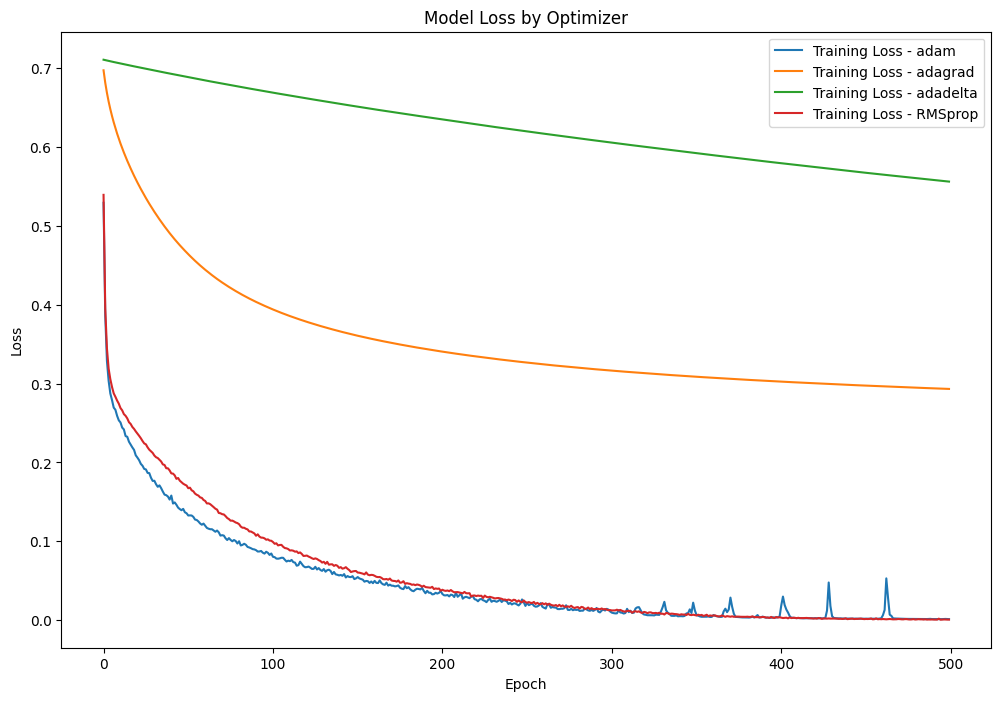

In [ ]:
plt.figure(figsize=(12, 8))

for opt_name in optimizers.keys():
    history = results[opt_name]
    plt.plot(history.history['loss'], label=f'Training Loss - {opt_name}')
    # plt.plot(history.history['val_loss'], label=f'Validation Loss - {opt_name}')

plt.title('Model Loss by Optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
optimizers = { 'adam' :{
    'adam_default': tf.keras.optimizers.Adam(),
    'adam_0.0001': tf.keras.optimizers.Adam(learning_rate=0.0001),
    'adam_0.01': tf.keras.optimizers.Adam(learning_rate=0.01),
    'adam_0.1': tf.keras.optimizers.Adam(learning_rate=0.1),
},
               'adagrad':{
    'adagrad_default': tf.keras.optimizers.Adagrad(),
    'adagrad_higher_lr': tf.keras.optimizers.Adagrad(learning_rate=0.1),
    'adagrad_higher_init_accum': tf.keras.optimizers.Adagrad(learning_rate=0.01, initial_accumulator_value=0.2),
               },
               'adadelta':{
    'adadelta_default': tf.keras.optimizers.Adadelta(),
    'adadelta_rho_0.9': tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95),
    'adadelta_rho_0.99': tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.99),
               }, 'RMSprop':{
    'RMSprop_default': tf.keras.optimizers.RMSprop(),
    'RMSprop_0.0001': tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    'RMSprop_0.01': tf.keras.optimizers.RMSprop(learning_rate=0.01),
    'RMSprop_adjusted_rho': tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.95),
    'RMSprop_momentum': tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.99)}
}

results = {
    'adam': {},
    'adagrad': {},
    'adadelta':{},
    'RMSprop':{}
}

for opt_name, opt_dicts in optimizers.items():
    print(f"\n******************************* {opt_name} ************************************\n")
    for optimiser_name, opt in opt_dicts.items() :
      print(f"\n******************************* {optimiser_name} ************************************\n")

      model = create_model()

      model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

      history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2,)
      results[opt_name][optimiser_name] = history


In [ ]:
results

{'adam': {'adam_default': <keras.src.callbacks.History at 0x7ea9bc67fd90>,
  'adam_0.0001': <keras.src.callbacks.History at 0x7ea9bc5eaf50>,
  'adam_0.01': <keras.src.callbacks.History at 0x7ea9bc3694b0>,
  'adam_0.1': <keras.src.callbacks.History at 0x7ea9bc20a8c0>},
 'adagrad': {'adagrad_default': <keras.src.callbacks.History at 0x7ea9a76faad0>,
  'adagrad_higher_lr': <keras.src.callbacks.History at 0x7ea9a660a740>,
  'adagrad_higher_init_accum': <keras.src.callbacks.History at 0x7ea9a550a440>},
 'adadelta': {'adadelta_default': <keras.src.callbacks.History at 0x7ea9c46382e0>,
  'adadelta_rho_0.9': <keras.src.callbacks.History at 0x7ea9cee8a0e0>,
  'adadelta_rho_0.99': <keras.src.callbacks.History at 0x7ea9c5f728c0>},
 'RMSprop': {'RMSprop_default': <keras.src.callbacks.History at 0x7ea9c5436dd0>,
  'RMSprop_0.0001': <keras.src.callbacks.History at 0x7ea9c418bbe0>,
  'RMSprop_0.01': <keras.src.callbacks.History at 0x7ea9c505d0c0>,
  'RMSprop_adjusted_rho': <keras.src.callbacks.Histor

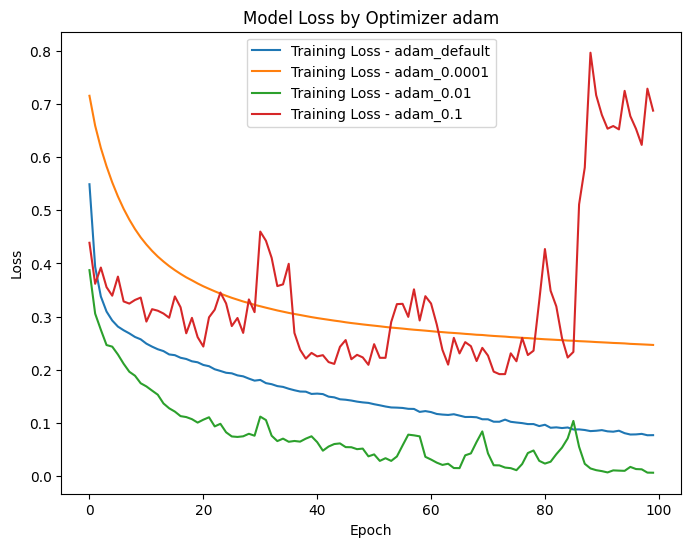

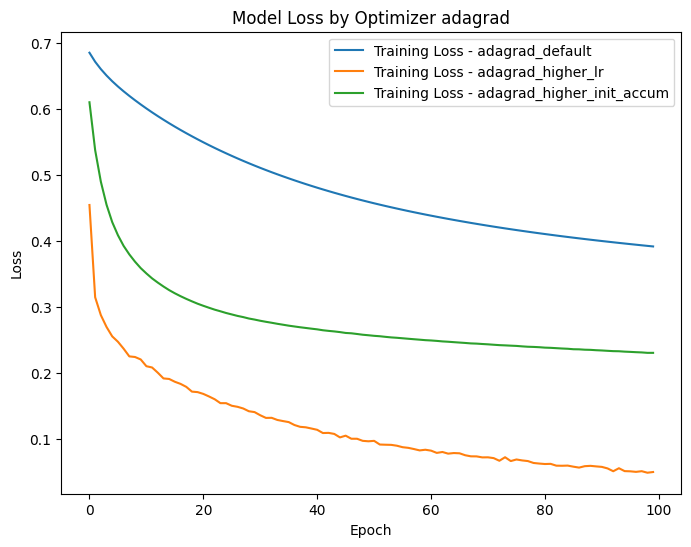

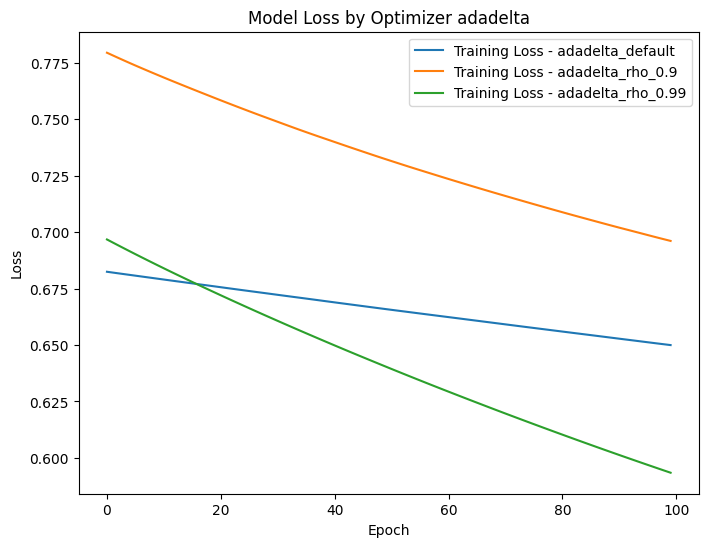

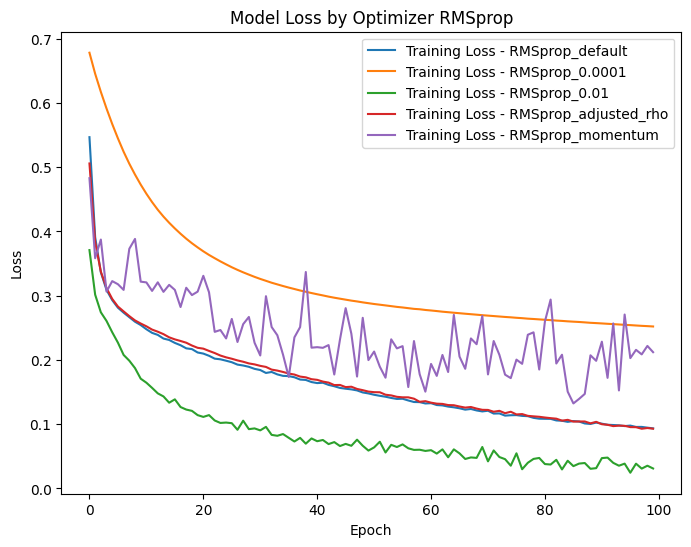

In [ ]:
for opt_name in optimizers.keys():
  plt.figure(figsize=(8, 6))
  for optimiser_name in results[opt_name].keys():
    history = results[opt_name][optimiser_name]
    plt.plot(history.history['loss'], label=f'Training Loss - {optimiser_name}')
    # plt.plot(history.history['val_loss'], label=f'Validation Loss - {opt_name}')

  plt.title(f'Model Loss by Optimizer {opt_name}')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

In [ ]:
def create_model_dropout(dropout_rate=0.5):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1)
    ])
    return model

In [ ]:
dropout_rate = [0.2, 0.3, 0.4, 0.5]

results = {}
for dropout in dropout_rate:
    model = create_model_dropout(dropout)

    model.compile(optimizer='Adam',
                  loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2)
    results[dropout] = history.history

Epoch 1/500
80/80 [==============================] - 3s 8ms/step - loss: 1.2552 - accuracy: 0.6363 - val_loss: 0.6121 - val_accuracy: 0.7453
Epoch 2/500
80/80 [==============================] - 0s 3ms/step - loss: 0.7464 - accuracy: 0.7266 - val_loss: 0.5175 - val_accuracy: 0.7906
Epoch 3/500
80/80 [==============================] - 0s 4ms/step - loss: 0.5657 - accuracy: 0.7605 - val_loss: 0.4178 - val_accuracy: 0.8250
Epoch 4/500
80/80 [==============================] - 0s 4ms/step - loss: 0.5140 - accuracy: 0.7746 - val_loss: 0.3782 - val_accuracy: 0.8375
Epoch 5/500
80/80 [==============================] - 0s 4ms/step - loss: 0.4867 - accuracy: 0.7863 - val_loss: 0.3619 - val_accuracy: 0.8500
Epoch 6/500
80/80 [==============================] - 0s 3ms/step - loss: 0.5072 - accuracy: 0.8082 - val_loss: 0.3369 - val_accuracy: 0.8594
Epoch 7/500
80/80 [==============================] - 0s 4ms/step - loss: 0.4642 - accuracy: 0.8152 - val_loss: 0.3646 - val_accuracy: 0.8547
Epoch 8/500
8

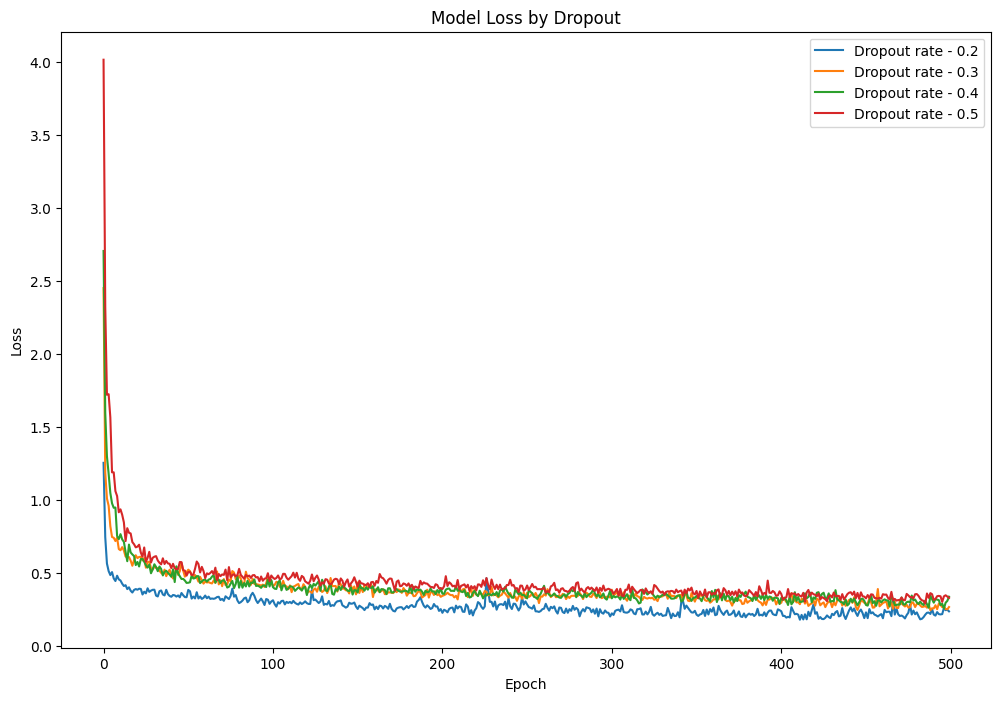

In [ ]:
plt.figure(figsize=(12, 8))

for dropout in dropout_rate:
    history = results[dropout]
    plt.plot(history['loss'], label=f'Dropout rate - {dropout}')

plt.title('Model Loss by Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()